<a href="https://colab.research.google.com/github/Atsuya12/Phishing-sites-prediction-with-machine-learning/blob/main/TCC_Artur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importação da base e pré-processamento

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from collections import Counter
from sklearn.metrics import confusion_matrix,mean_squared_error,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report , roc_curve, f1_score, accuracy_score, recall_score , roc_auc_score,make_scorer

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df= pd.read_csv("/content/phishing_site_urls.csv")
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


<BarContainer object of 2 artists>

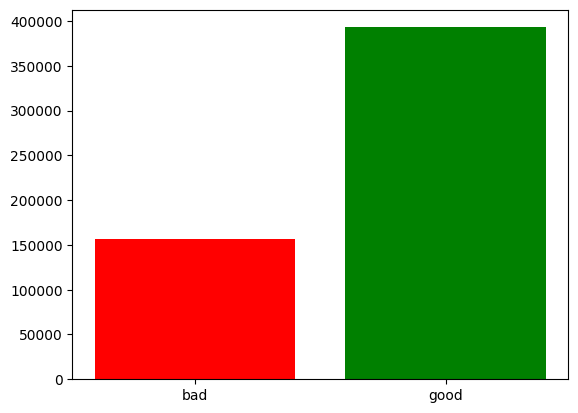

In [ ]:
x=df.Label.unique()
x
y=np.array([df[df['Label']=='bad'].count()[0],df[df['Label']=='good'].count()[0]])
y

plt.bar(x,y,color=[ 'red', 'green'])

In [ ]:
df.isna().sum()

URL      0
Label    0
dtype: int64

In [ ]:
df.URL.duplicated().sum()

42151

In [ ]:
df.drop(df[df.URL.duplicated() == True].index, axis = 0, inplace = True)
df.reset_index(drop=True)

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad
...,...,...
507190,23.227.196.215/,bad
507191,apple-checker.org/,bad
507192,apple-iclods.org/,bad
507193,apple-uptoday.org/,bad


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))
sw=list(set(stopwords.words("english")))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['clean_url']=df.URL.astype(str)
#df['clean_url']=df['clean_url'].apply(lambda x:" ".join([word for word in x.split() if word not in sw]))
df.head()

,URL,Label,clean_url
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,nobell.it/70ffb52d079109dca5664cce6f317373782/...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,serviciosbys.com/paypal.cgi.bin.get-into.herf....
3,mail.printakid.com/www.online.americanexpress....,bad,mail.printakid.com/www.online.americanexpress....
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,thewhiskeydregs.com/wp-content/themes/widescre...


In [ ]:
tok= RegexpTokenizer(r'[A-Za-z0-9]+')
tok.tokenize(df.URL[1])
df.clean_url=df.clean_url.map(lambda x: tok.tokenize(x))
df.head()

,URL,Label,clean_url
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, 70ffb52d079109dca5664cce6f3173737..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi..."


In [ ]:
nltk.download('omw-1.4')
wnl = WordNetLemmatizer()
df['lem_url'] = df['clean_url'].map(lambda x: [wnl.lemmatize(word) for word in x])
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,URL,Label,clean_url,lem_url
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, 70ffb52d079109dca5664cce6f3173737...","[nobell, it, 70ffb52d079109dca5664cce6f3173737..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbys, com, paypal, cgi, bin, get, int..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, online, americanex..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydregs, com, wp, content, theme, wid..."


In [ ]:
word_vectorizer = TfidfVectorizer(ngram_range=(1,1), max_features =1000)

unigramdataGet= word_vectorizer.fit_transform(df['lem_url'].astype('str'))
unigramdataGet = unigramdataGet.toarray()
vocab = word_vectorizer.get_feature_names_out ()
x=pd.DataFrame(np.round(unigramdataGet, 1), columns=vocab)
x[x>0] = 1

In [ ]:
cv = CountVectorizer()
feature = cv.fit_transform(df.lem_url.astype('str'))

#Processo de divisão da base e balanceamento

In [ ]:
y=df.Label
y=np.where(y=='bad',0,1)

In [ ]:
x_train,x_test,y_train,y_test =  train_test_split(feature,y,random_state=42,test_size=0.2,shuffle=True)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Use RandomUnderSampler para o undersampling
under_sampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
x_treino_undersampled, y_treino_undersampled = under_sampler.fit_resample(x_train, y_train)

# Resuma a distribuição das classes após o undersampling
print("Distribuição das classes após Undersampling:", Counter(y_treino_undersampled))




Distribuição das classes após Undersampling: Counter({0: 91564, 1: 91564})


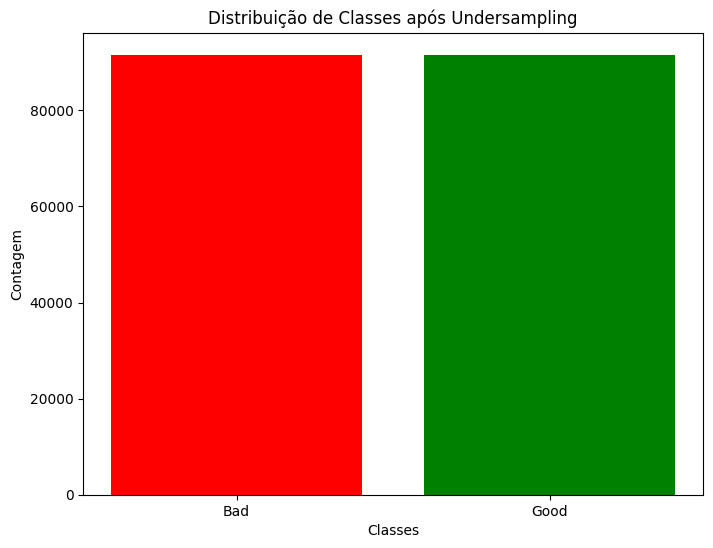

In [ ]:
# Contagem das classes após o undersampling
unique, counts = np.unique(y_treino_undersampled, return_counts=True)

# Rótulos para as classes
labels = ['Bad', 'Good']

# Criação do gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['red', 'green'])
plt.xlabel('Classes')
plt.ylabel('Contagem')
plt.title('Distribuição de Classes após Undersampling')
plt.show()

#Testes com os algoritmos

Acurácia do modelo de Árvore de Decisão: 0.9456717830420253
Matriz de Confusão:
[[20563  2171]
 [ 3340 75365]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     22734
           1       0.97      0.96      0.96     78705

    accuracy                           0.95    101439
   macro avg       0.92      0.93      0.92    101439
weighted avg       0.95      0.95      0.95    101439



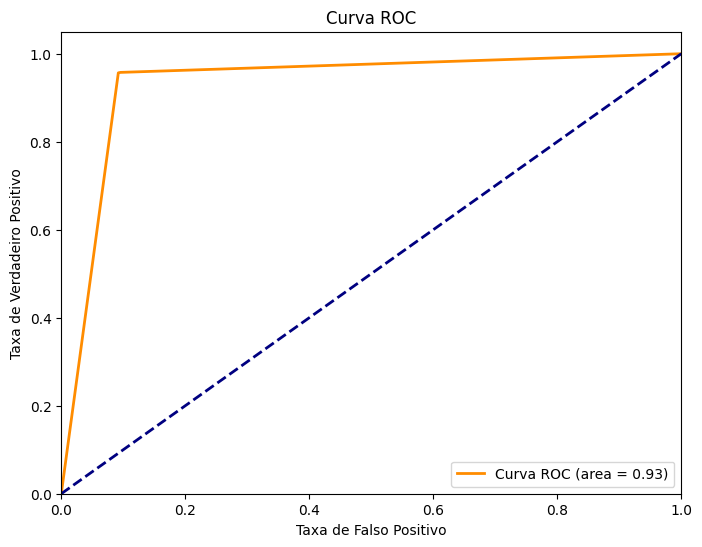

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Crie uma instância da Árvore de Decisão
dt_model = DecisionTreeClassifier(random_state=42)

# Treine o modelo com os dados de treinamento após o undersampling
dt_model.fit(x_treino_undersampled, y_treino_undersampled)

# Faça previsões com os dados de teste
y_pred = dt_model.predict(x_test)

# Calcule a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo de Árvore de Decisão:", accuracy)

# Exiba a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

# Exiba um relatório de classificação
class_report = classification_report(y_test, y_pred)
print("Relatório de Classificação:")
print(class_report)

# Calcule as probabilidades das classes para a curva ROC
y_prob = dt_model.predict_proba(x_test)[:, 1]

# Calcule a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plote a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acurácia da Regressão Logística: 0.9567030432082335
Matriz de Confusão:
[[20953  1781]
 [ 2611 76094]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91     22734
           1       0.98      0.97      0.97     78705

    accuracy                           0.96    101439
   macro avg       0.93      0.94      0.94    101439
weighted avg       0.96      0.96      0.96    101439



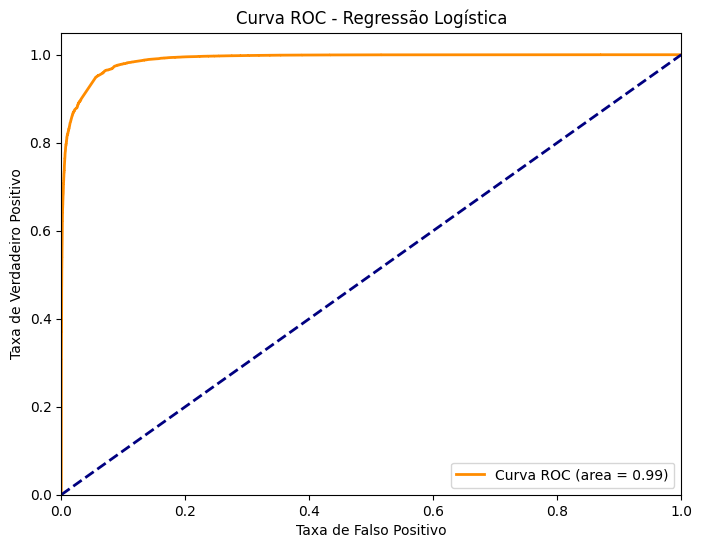

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Crie uma instância do modelo de Regressão Logística
logistic_regression_model = LogisticRegression(random_state=42)

# Treine o modelo
logistic_regression_model.fit(x_treino_undersampled, y_treino_undersampled)

# Faça previsões
y_pred = logistic_regression_model.predict(x_test)

# Avalie o modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia da Regressão Logística:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Relatório de Classificação:")
print(class_report)

# Calcule as probabilidades das classes para a curva ROC
y_prob = logistic_regression_model.predict_proba(x_test)[:, 1]

# Calcule a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plote a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC - Regressão Logística')
plt.legend(loc="lower right")
plt.show()


Acurácia do SVM: 0.965250051755242
Matriz de Confusão:
[[21152  1582]
 [ 1943 76762]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     22734
           1       0.98      0.98      0.98     78705

    accuracy                           0.97    101439
   macro avg       0.95      0.95      0.95    101439
weighted avg       0.97      0.97      0.97    101439



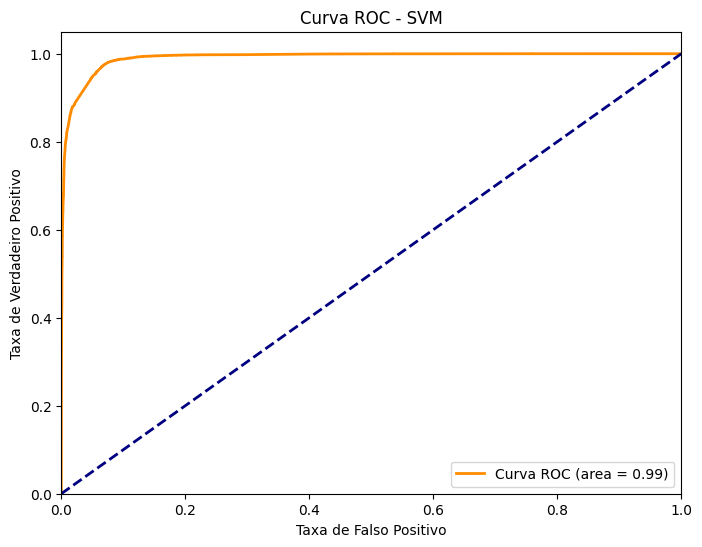

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Crie uma instância do modelo SVM
svm_model = SVC(kernel='linear', random_state=42)

# Treine o modelo
svm_model.fit(x_treino_undersampled, y_treino_undersampled)

# Faça previsões
y_pred = svm_model.predict(x_test)

# Avalie o modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do SVM:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Relatório de Classificação:")
print(class_report)

# Calcule as probabilidades das classes para a curva ROC
y_prob = svm_model.decision_function(x_test)

# Calcule a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plote a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC - SVM')
plt.legend(loc="lower right")
plt.show()


Acurácia do Naive Bayes: 0.943966324589162
Matriz de Confusão:
[[21246  1488]
 [ 4196 74509]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88     22734
           1       0.98      0.95      0.96     78705

    accuracy                           0.94    101439
   macro avg       0.91      0.94      0.92    101439
weighted avg       0.95      0.94      0.95    101439



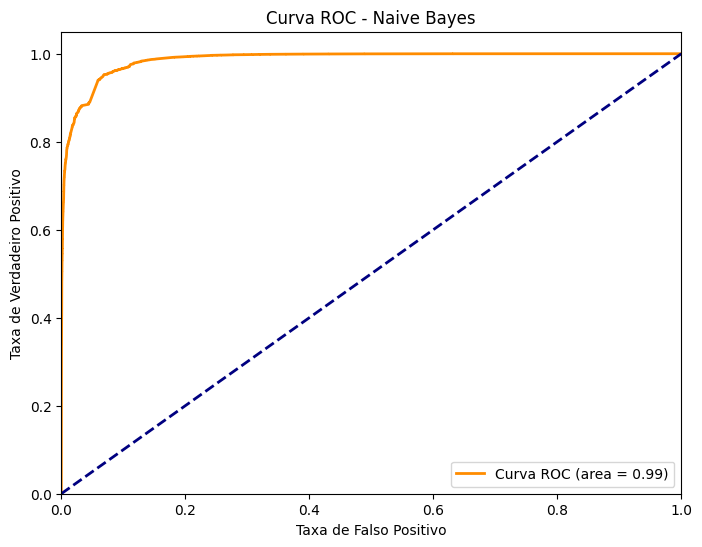

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Crie uma instância do modelo Naive Bayes
naive_bayes_model = MultinomialNB()

# Treine o modelo
naive_bayes_model.fit(x_treino_undersampled, y_treino_undersampled)

# Faça previsões
y_pred = naive_bayes_model.predict(x_test)

# Avalie o modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do Naive Bayes:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Relatório de Classificação:")
print(class_report)

# Calcule as probabilidades das classes para a curva ROC
y_prob = naive_bayes_model.predict_proba(x_test)[:, 1]

# Calcule a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plote a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC - Naive Bayes')
plt.legend(loc="lower right")
plt.show()


Acurácia do modelo Random Forest: 0.9527696448111673
Matriz de Confusão:
[[20858  1876]
 [ 2915 75790]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     22734
           1       0.98      0.96      0.97     78705

    accuracy                           0.95    101439
   macro avg       0.93      0.94      0.93    101439
weighted avg       0.95      0.95      0.95    101439



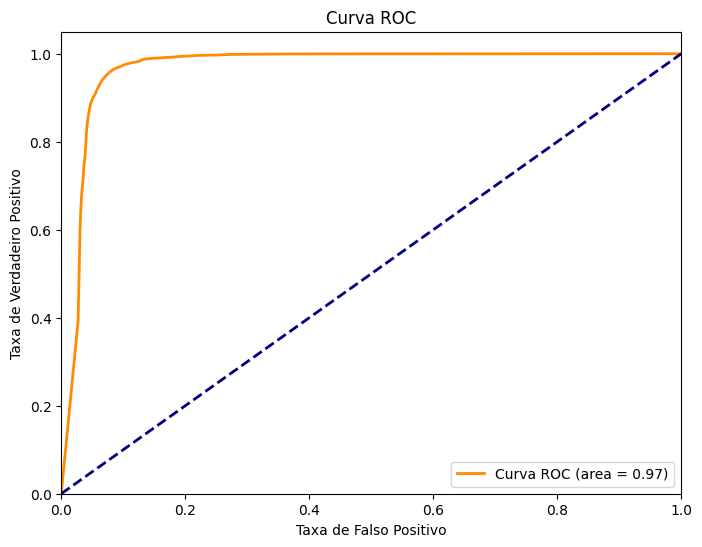

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crie uma instância do Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Treine o modelo com os dados de treinamento após o undersampling
rf_model.fit(x_treino_undersampled, y_treino_undersampled)

# Faça previsões com os dados de teste
y_pred = rf_model.predict(x_test)

# Calcule a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo Random Forest:", accuracy)

# Exiba a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

# Exiba um relatório de classificação
class_report = classification_report(y_test, y_pred)
print("Relatório de Classificação:")
print(class_report)

# Calcule as probabilidades das classes para a curva ROC
y_prob = rf_model.predict_proba(x_test)[:, 1]

# Calcule a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plote a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
